# Pré Processamento dos dados para o Subsistema NE (Treinamento e Validação)

O objetivo deste código é gerar um .csv com todos os dados de treinamento e validação, além dos dados de normalização para o treinamento das redes

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importação e visualização dos dados

### Importação

In [2]:
dados = pd.read_csv('../Dados/NE_2025-05-22_CARGAHIST.csv', sep=';', index_col='DataHora', decimal=',')
dados.index = pd.to_datetime(dados.index, format="%Y-%m-%dT%H:%M:%SZ")
dados

,Carga
DataHora,
2018-01-01 01:00:00,10157.4920
2018-01-01 02:00:00,9870.7840
2018-01-01 03:00:00,9897.9670
2018-01-01 04:00:00,9921.7940
2018-01-01 05:00:00,9923.2280
...,...
2025-05-21 20:00:00,13741.2065
2025-05-21 21:00:00,13614.5025
2025-05-21 22:00:00,14053.2390


In [3]:
dados_temperatura = pd.read_csv('../Dados/NE_2025-05-22_EXOGENAHIST.csv', sep=';', index_col='DataHora', decimal=',')
dados_temperatura.index = pd.to_datetime(dados_temperatura.index, format="%Y-%m-%dT%H:%M:%SZ")
dados_temperatura

,Exo_Temperatura
DataHora,
2018-01-01 00:00:00,26.613001
2018-01-01 01:00:00,26.783001
2018-01-01 02:00:00,26.443001
2018-01-01 03:00:00,26.273001
2018-01-01 04:00:00,26.273001
...,...
2025-05-21 19:00:00,26.066000
2025-05-21 20:00:00,25.499000
2025-05-21 21:00:00,25.499000


In [4]:
dias_feriados = pd.read_csv('../Dados/NE_2025-05-22_FERIADOS.csv', sep=';', index_col='Data')
dias_feriados.index = pd.to_datetime(dias_feriados.index, format="%Y-%m-%d")
dias_feriados

,Tipo
Data,
2018-01-01,6
2018-01-02,7
2018-02-12,3
2018-02-13,4
2018-02-14,5
...,...
2025-04-18,2
2025-04-20,2
2025-04-21,2


### Retirando 2025

In [5]:
dados = dados[dados.index.year != 2025]
dados

,Carga
DataHora,
2018-01-01 01:00:00,10157.4920
2018-01-01 02:00:00,9870.7840
2018-01-01 03:00:00,9897.9670
2018-01-01 04:00:00,9921.7940
2018-01-01 05:00:00,9923.2280
...,...
2024-12-31 19:00:00,14220.5805
2024-12-31 20:00:00,14496.1800
2024-12-31 21:00:00,14186.2200


In [6]:
dados_temperatura = dados_temperatura[dados_temperatura.index.year != 2025]
dados_temperatura

,Exo_Temperatura
DataHora,
2018-01-01 00:00:00,26.613001
2018-01-01 01:00:00,26.783001
2018-01-01 02:00:00,26.443001
2018-01-01 03:00:00,26.273001
2018-01-01 04:00:00,26.273001
...,...
2024-12-31 19:00:00,27.784000
2024-12-31 20:00:00,27.784000
2024-12-31 21:00:00,27.387000


In [7]:
dias_feriados = dias_feriados[dias_feriados.index.year != 2025]
dias_feriados

,Tipo
Data,
2018-01-01,6
2018-01-02,7
2018-02-12,3
2018-02-13,4
2018-02-14,5
...,...
2024-12-27,12
2024-12-28,12
2024-12-29,12


### Vizualização

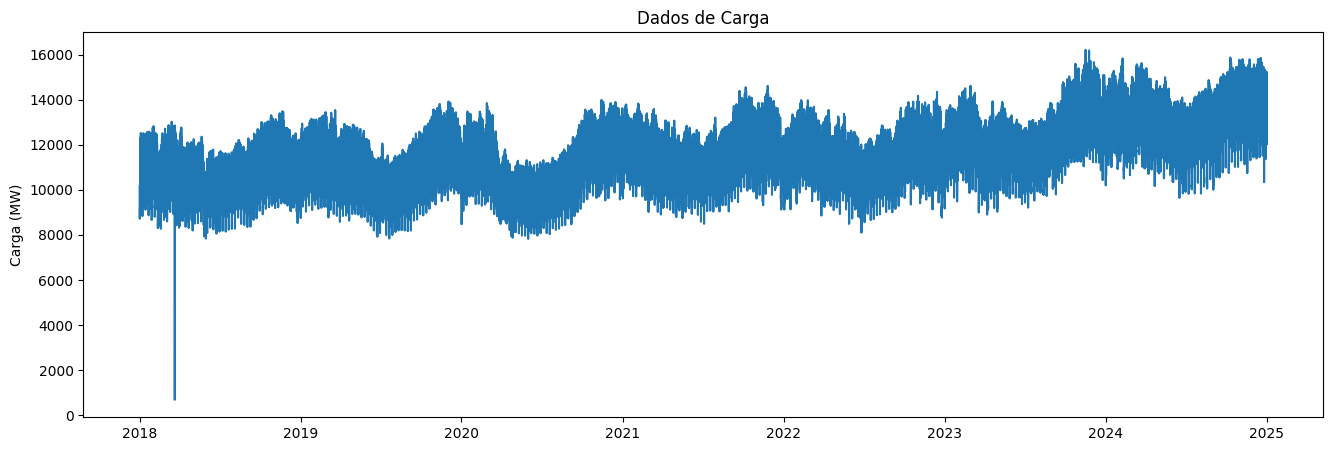

In [8]:
plt.figure(figsize=(16, 5))
plt.plot(dados.index, dados['Carga'], linestyle='-')
plt.title('Dados de Carga')
plt.ylabel('Carga (MW)')
plt.show()

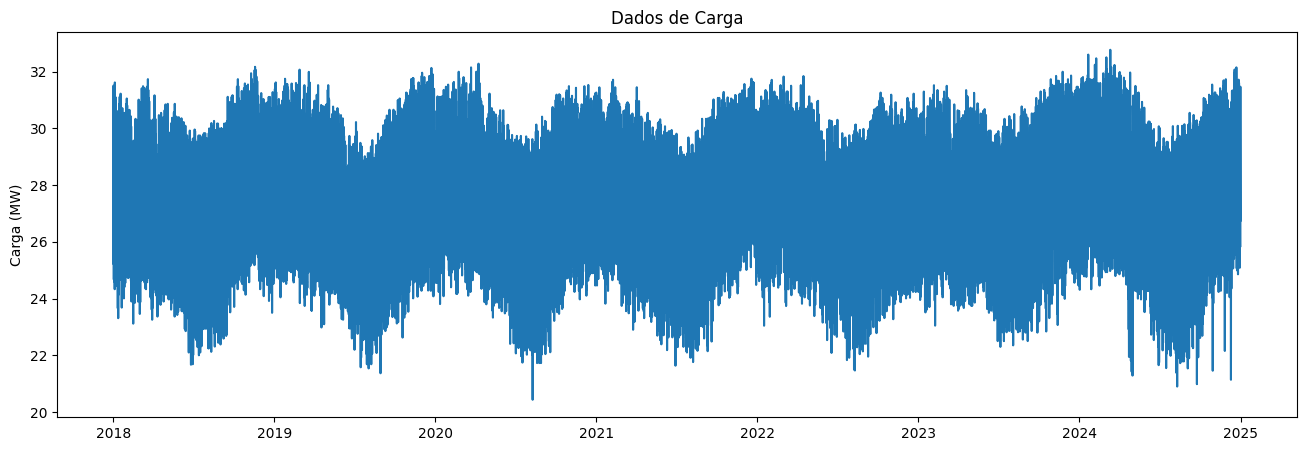

In [9]:
plt.figure(figsize=(16, 5))
plt.plot(dados_temperatura.index, dados_temperatura['Exo_Temperatura'], linestyle='-')
plt.title('Dados de Carga')
plt.ylabel('Carga (MW)')
plt.show()

## Estudo dos outliers e feriados

### Carga

#### Feriados

In [10]:
dados_sem_feriados = dados.copy()
dados_sem_feriados

,Carga
DataHora,
2018-01-01 01:00:00,10157.4920
2018-01-01 02:00:00,9870.7840
2018-01-01 03:00:00,9897.9670
2018-01-01 04:00:00,9921.7940
2018-01-01 05:00:00,9923.2280
...,...
2024-12-31 19:00:00,14220.5805
2024-12-31 20:00:00,14496.1800
2024-12-31 21:00:00,14186.2200


In [11]:
# Retirando os dois primeiros dias que não é possivel substituir

dias_de_feriado = list(dias_feriados.index.date)
dias_de_feriado = dias_de_feriado[2:]
dias_de_feriado

[datetime.date(2018, 2, 12),
 datetime.date(2018, 2, 13),
 datetime.date(2018, 2, 14),
 datetime.date(2018, 3, 30),
 datetime.date(2018, 4, 1),
 datetime.date(2018, 4, 21),
 datetime.date(2018, 4, 30),
 datetime.date(2018, 5, 1),
 datetime.date(2018, 5, 31),
 datetime.date(2018, 6, 1),
 datetime.date(2018, 6, 17),
 datetime.date(2018, 6, 22),
 datetime.date(2018, 6, 27),
 datetime.date(2018, 7, 2),
 datetime.date(2018, 7, 6),
 datetime.date(2018, 9, 7),
 datetime.date(2018, 10, 12),
 datetime.date(2018, 11, 2),
 datetime.date(2018, 11, 15),
 datetime.date(2018, 11, 16),
 datetime.date(2018, 12, 8),
 datetime.date(2018, 12, 24),
 datetime.date(2018, 12, 25),
 datetime.date(2018, 12, 26),
 datetime.date(2018, 12, 31),
 datetime.date(2019, 1, 1),
 datetime.date(2019, 1, 2),
 datetime.date(2019, 3, 4),
 datetime.date(2019, 3, 5),
 datetime.date(2019, 3, 6),
 datetime.date(2019, 4, 19),
 datetime.date(2019, 4, 21),
 datetime.date(2019, 5, 1),
 datetime.date(2019, 6, 20),
 datetime.date(2019

In [12]:
# Troca os dados do dia identificado como feriado pela carga do dia 7 dias atras

for feriados in dias_de_feriado:
    feriados_indices = dados_sem_feriados.index[dados_sem_feriados.index.date == feriados]

    for idx in feriados_indices:
        data_semana_anterior = idx - pd.Timedelta(weeks=1)
        dados_sem_feriados.at[idx, 'Carga'] = dados_sem_feriados.at[data_semana_anterior, 'Carga']

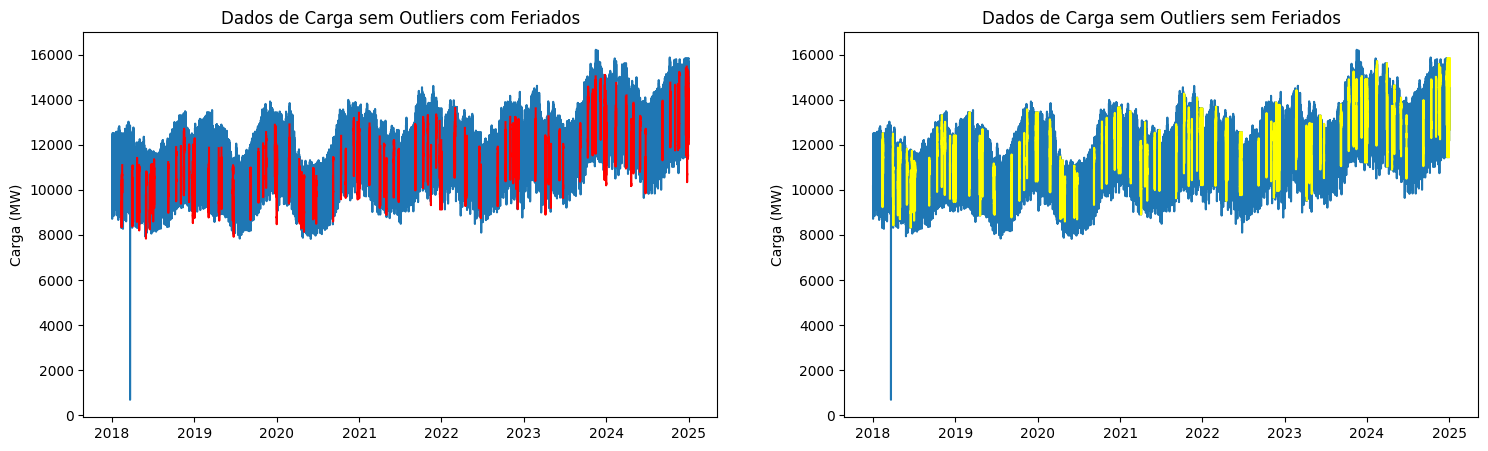

In [13]:
# Plotando os dados de carga
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
axes[0].plot(dados_sem_feriados.index, dados_sem_feriados['Carga'], linestyle='-', label='Carga')

# Destacar os dias com outliers
for dia in dias_de_feriado:
    # Filtrar os dados do dia
    dados_do_dia = dados[dados.index.date == dia]
    # Plotar os pontos de outliers (marcadores vermelhos)
    axes[0].plot(dados_do_dia.index, dados_do_dia['Carga'], color='red', label=f'Outliers - {dia}')

axes[1].plot(dados_sem_feriados.index, dados_sem_feriados['Carga'], linestyle='-', label='Carga')

for dia in dias_de_feriado:
    # Filtrar os dados do dia
    dados_do_dia = dados_sem_feriados[dados_sem_feriados.index.date == dia]
    # Plotar os pontos de outliers (marcadores vermelhos)
    axes[1].plot(dados_do_dia.index, dados_do_dia['Carga'], color='yellow', label=f'Outliers - {dia}')

# Adicionar título e rótulos
axes[0].set_title('Dados de Carga sem Outliers com Feriados')
axes[0].set_ylabel('Carga (MW)')
axes[1].set_title('Dados de Carga sem Outliers sem Feriados')
axes[1].set_ylabel('Carga (MW)')

plt.show()

#### Outliers

In [14]:
dados_sem_feriados_outliers = dados_sem_feriados.copy()
dados_sem_feriados_outliers

,Carga
DataHora,
2018-01-01 01:00:00,10157.4920
2018-01-01 02:00:00,9870.7840
2018-01-01 03:00:00,9897.9670
2018-01-01 04:00:00,9921.7940
2018-01-01 05:00:00,9923.2280
...,...
2024-12-31 19:00:00,15241.2835
2024-12-31 20:00:00,15239.9130
2024-12-31 21:00:00,15207.4945


In [15]:
# Identifica os outliers de carga para cada ano de forma separada para k = 1.5

# Supondo que 'dados' seja um DataFrame com uma coluna 'Carga' e um índice datetime
dados_sem_feriados_outliers["Ano"] = dados_sem_feriados_outliers.index.year  # Extrai o ano do índice

# Variável para armazenar as datas com outliers
datas_com_outliers = set()

# Loop pelos anos únicos na base de dados
for ano in dados_sem_feriados_outliers["Ano"].unique():
    dados_ano = dados_sem_feriados_outliers[dados_sem_feriados_outliers["Ano"] == ano]  # Filtra apenas os dados do ano atual
    
    # Calcular quartis e IQR
    Q1 = dados_ano["Carga"].quantile(0.25)
    Q3 = dados_ano["Carga"].quantile(0.75)
    IQR = Q3 - Q1

    # Definir limites para outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers_inferiores = dados_ano[dados_ano["Carga"] < limite_inferior]
    outliers_superiores = dados_ano[dados_ano["Carga"] > limite_superior]

    # Verificar se há outliers inferiores e adicionar as datas
    if not outliers_inferiores.empty:
        datas_com_outliers.update(outliers_inferiores.index.date)
        print(f'{len(outliers_inferiores)} outliers inferiores encontrados no ano {ano}.')

    # Verificar se há outliers superiores e adicionar as datas
    if not outliers_superiores.empty:
        #datas_com_outliers.update(outliers_superiores.index.date)
        print(f'{len(outliers_superiores)} outliers superiores encontrados no ano {ano}.')

# Exibir as datas com ao menos um outlier
datas_com_outliers = sorted(datas_com_outliers)
print(f'Datas com ao menos um outlier: {datas_com_outliers}')
dados_sem_feriados_outliers.drop(['Ano'], axis='columns', inplace=True)

4 outliers inferiores encontrados no ano 2018.
2 outliers inferiores encontrados no ano 2019.
4 outliers inferiores encontrados no ano 2021.
3 outliers inferiores encontrados no ano 2022.
5 outliers inferiores encontrados no ano 2023.
12 outliers superiores encontrados no ano 2023.
5 outliers inferiores encontrados no ano 2024.
Datas com ao menos um outlier: [datetime.date(2018, 3, 21), datetime.date(2019, 7, 21), datetime.date(2021, 6, 27), datetime.date(2021, 7, 4), datetime.date(2022, 6, 26), datetime.date(2023, 3, 19), datetime.date(2023, 4, 30), datetime.date(2024, 6, 16)]


In [16]:
# Troca os dados do dia identificado como outlier pela carga do dia 7 dias atras

for outlier_date in datas_com_outliers:
    outlier_indices = dados_sem_feriados_outliers.index[dados_sem_feriados_outliers.index.date == outlier_date]

    for idx in outlier_indices:
        data_semana_anterior = idx - pd.Timedelta(weeks=1)
        dados_sem_feriados_outliers.at[idx, 'Carga'] = dados_sem_feriados_outliers.at[data_semana_anterior, 'Carga']

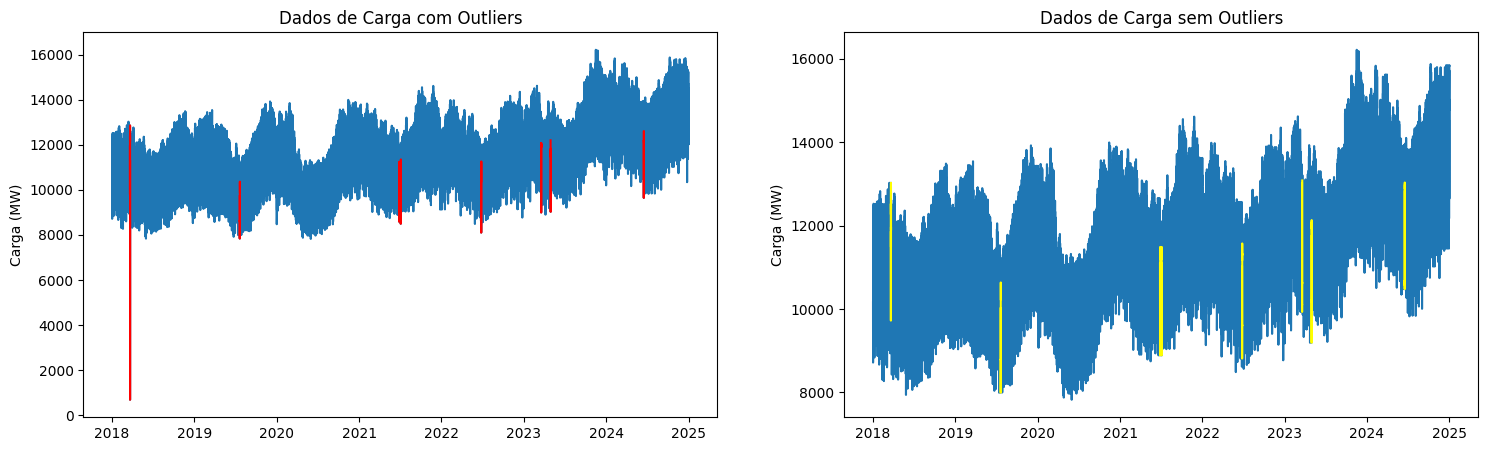

In [17]:
# Plotando os dados de carga
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
axes[0].plot(dados.index, dados['Carga'], linestyle='-', label='Carga')

# Destacar os dias com outliers
for dia in datas_com_outliers:
    # Filtrar os dados do dia
    dados_do_dia = dados[dados.index.date == dia]
    # Plotar os pontos de outliers (marcadores vermelhos)
    axes[0].plot(dados_do_dia.index, dados_do_dia['Carga'], color='red', label=f'Outliers - {dia}')

axes[1].plot(dados_sem_feriados_outliers.index, dados_sem_feriados_outliers['Carga'], linestyle='-', label='Carga')

for dia in datas_com_outliers:
    # Filtrar os dados do dia
    dados_do_dia = dados_sem_feriados_outliers[dados_sem_feriados_outliers.index.date == dia]
    # Plotar os pontos de outliers (marcadores vermelhos)
    axes[1].plot(dados_do_dia.index, dados_do_dia['Carga'], color='yellow', label=f'Outliers - {dia}')

# Adicionar título e rótulos
axes[0].set_title('Dados de Carga com Outliers')
axes[0].set_ylabel('Carga (MW)')
axes[1].set_title('Dados de Carga sem Outliers')
axes[1].set_ylabel('Carga (MW)')

plt.show()

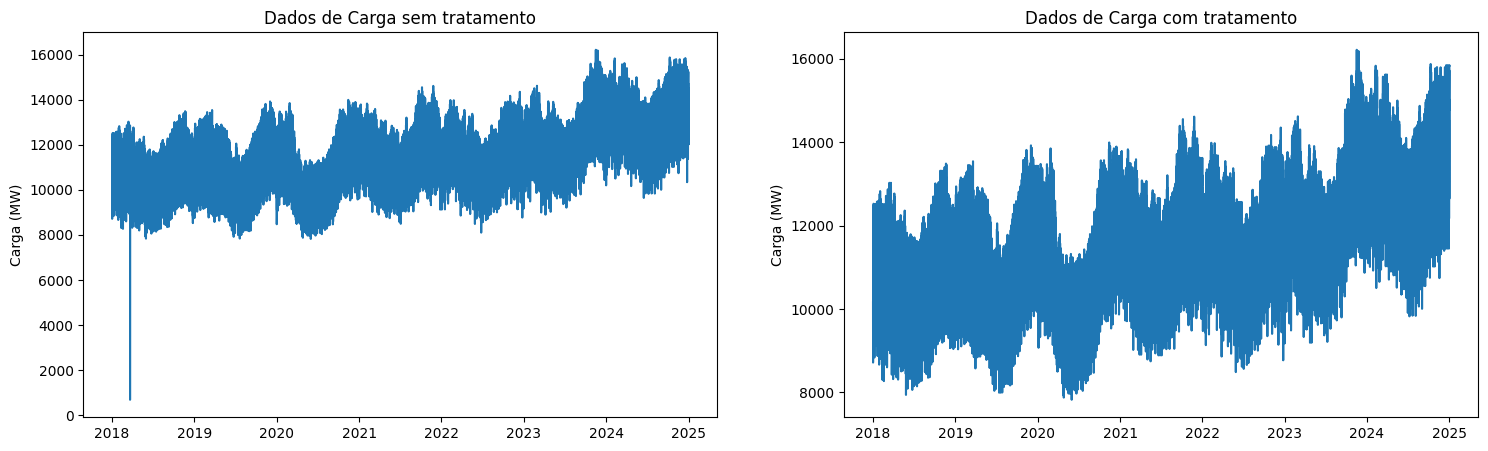

In [18]:
# Plotando os dados de carga
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
axes[0].plot(dados.index, dados['Carga'], linestyle='-', label='Carga')

axes[1].plot(dados_sem_feriados_outliers.index, dados_sem_feriados_outliers['Carga'], linestyle='-', label='Carga')

# Adicionar título e rótulos
axes[0].set_title('Dados de Carga sem tratamento')
axes[0].set_ylabel('Carga (MW)')
axes[1].set_title('Dados de Carga com tratamento')
axes[1].set_ylabel('Carga (MW)')

plt.show()

### Temperatura

In [19]:
dados_temperatura_sem_outlier = dados_temperatura.copy()
dados_temperatura_sem_outlier

,Exo_Temperatura
DataHora,
2018-01-01 00:00:00,26.613001
2018-01-01 01:00:00,26.783001
2018-01-01 02:00:00,26.443001
2018-01-01 03:00:00,26.273001
2018-01-01 04:00:00,26.273001
...,...
2024-12-31 19:00:00,27.784000
2024-12-31 20:00:00,27.784000
2024-12-31 21:00:00,27.387000


In [20]:
# Identifica os outliers de temperatura para todo o horizonte para k = 1.5

# Calcular quartis
Q1 = dados_temperatura_sem_outlier['Exo_Temperatura'].quantile(0.25)  # Primeiro quartil (25%)
Q3 = dados_temperatura_sem_outlier['Exo_Temperatura'].quantile(0.75)  # Terceiro quartil (75%)
IQR = Q3 - Q1  # Intervalo interquartil

# Definir limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_inferiores = dados_temperatura[(dados_temperatura['Exo_Temperatura'] < limite_inferior)]
outliers_superiores = dados_temperatura[(dados_temperatura['Exo_Temperatura'] > limite_superior)]

# Variável para armazenar as datas com outliers
datas_com_outliers_temperatura = set()

# Verificar se há outliers inferiores e adicionar as datas
if len(outliers_inferiores) > 0:
    datas_com_outliers_temperatura.update(outliers_inferiores.index.date)
    print(f'{len(outliers_inferiores)} outliers inferiores encontrados.')
else:
    print("Nenhum outlier inferior foi encontrado.")

# Verificar se há outliers superiores e adicionar as datas
if len(outliers_superiores) > 0:
    # Verificar se o índice está em formato datetime antes de converter
    datas_com_outliers_temperatura.update(outliers_superiores.index.date)  # Adiciona as datas dos outliers superiores
    print(f'{len(outliers_superiores)} outliers superiores encontrados.')
else:
    print("Nenhum outlier superior foi encontrado.")

# Exibir as datas com ao menos um outlier
datas_com_outliers_temperatura = sorted(datas_com_outliers_temperatura)
print(f'Datas com ao menos um outlier: {sorted(datas_com_outliers_temperatura)}')

Nenhum outlier inferior foi encontrado.
Nenhum outlier superior foi encontrado.
Datas com ao menos um outlier: []


In [21]:
# Troca os dados do dia identificado como outlier pela temperatura do dia 7 dias atras

for outlier_date in datas_com_outliers_temperatura:
        outlier_indices = dados_temperatura_sem_outlier.index[dados_temperatura_sem_outlier.index.date == outlier_date]

        for idx in outlier_indices:
            data_semana_anterior = idx - pd.Timedelta(weeks=1)
            dados_temperatura_sem_outlier.at[idx, 'Exo_Temperatura'] = dados_temperatura_sem_outlier.at[data_semana_anterior, 'Exo_Temperatura']

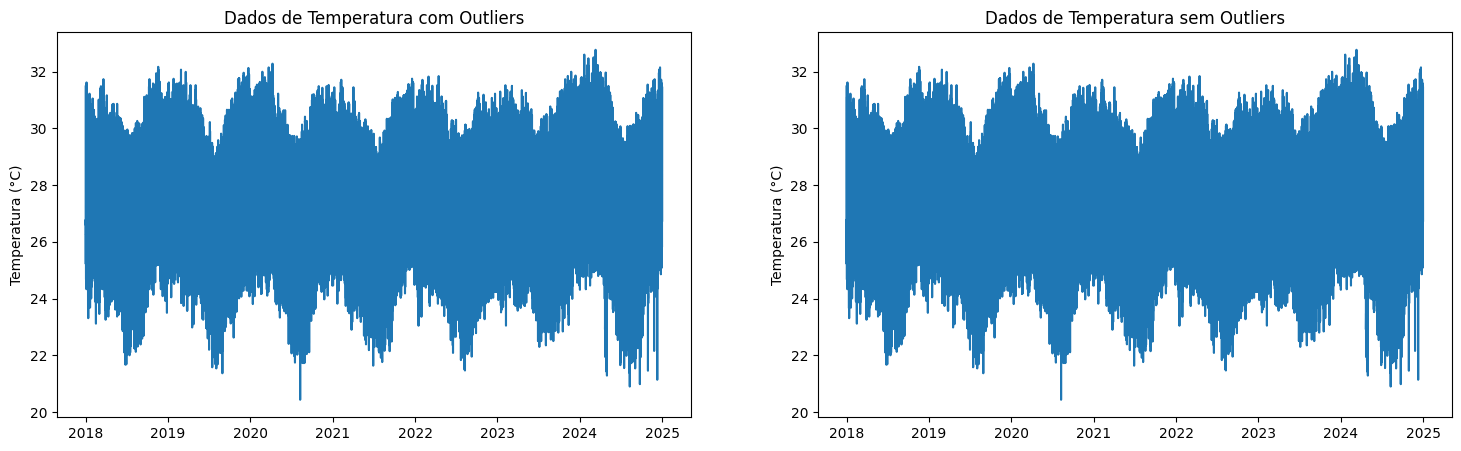

In [22]:
# Plotando os dados de carga
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
axes[0].plot(dados_temperatura.index, dados_temperatura['Exo_Temperatura'], linestyle='-', label='Temperatura')

# Destacar os dias com outliers
for dia in datas_com_outliers_temperatura:
    # Filtrar os dados do dia
    dados_do_dia = dados_temperatura[dados_temperatura.index.date == dia]
    # Plotar os pontos de outliers (marcadores vermelhos)
    axes[0].plot(dados_do_dia.index, dados_do_dia['Exo_Temperatura'], color='red', label=f'Outliers - {dia}')

axes[1].plot(dados_temperatura_sem_outlier.index, dados_temperatura_sem_outlier['Exo_Temperatura'], linestyle='-', label='Exo_Temperatura')

for dia in datas_com_outliers_temperatura:
    # Filtrar os dados do dia
    dados_do_dia = dados_temperatura_sem_outlier[dados_temperatura_sem_outlier.index.date == dia]
    # Plotar os pontos de outliers (marcadores vermelhos)
    axes[1].plot(dados_do_dia.index, dados_do_dia['Exo_Temperatura'], color='yellow', label=f'Outliers - {dia}')

# Adicionar título e rótulos
axes[0].set_title('Dados de Temperatura com Outliers')
axes[0].set_ylabel('Temperatura (°C)')
axes[1].set_title('Dados de Temperatura sem Outliers')
axes[1].set_ylabel('Temperatura (°C)')

plt.show()

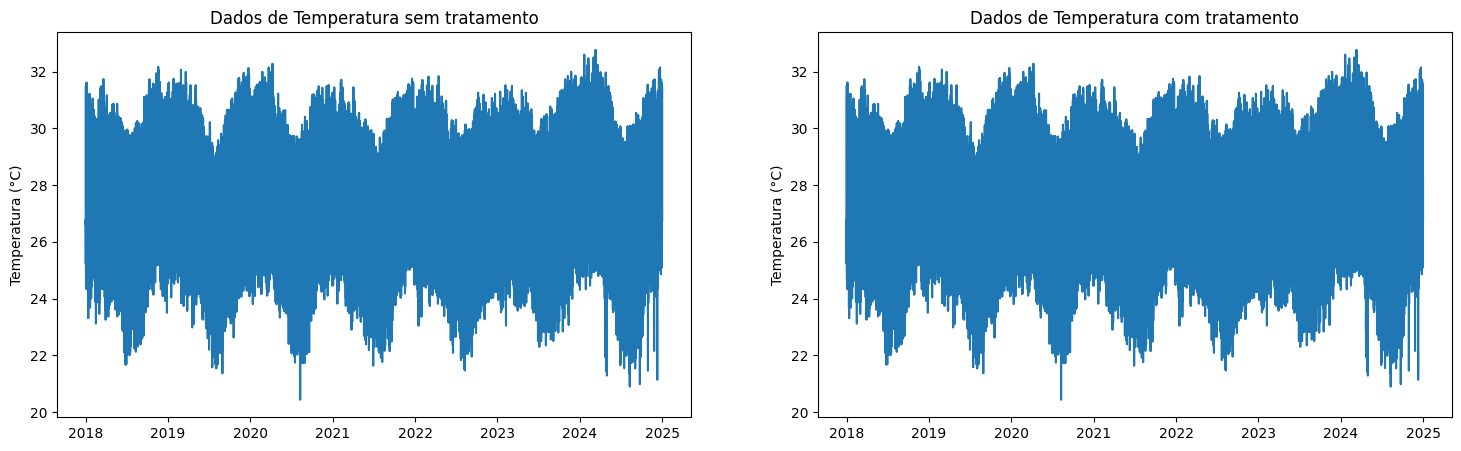

In [23]:
# Plotando os dados de carga
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
axes[0].plot(dados_temperatura.index, dados_temperatura['Exo_Temperatura'], linestyle='-', label='Temperatura')

axes[1].plot(dados_temperatura_sem_outlier.index, dados_temperatura_sem_outlier['Exo_Temperatura'], linestyle='-', label='Temperatura')

# Adicionar título e rótulos
axes[0].set_title('Dados de Temperatura sem tratamento')
axes[0].set_ylabel('Temperatura (°C)')
axes[1].set_title('Dados de Temperatura com tratamento')
axes[1].set_ylabel('Temperatura (°C)')

plt.show()

## Adicionando dados importantes para o treinamento no dataframe

In [24]:
dados_com_adicao = dados_sem_feriados_outliers.copy()
dados_com_adicao

,Carga
DataHora,
2018-01-01 01:00:00,10157.4920
2018-01-01 02:00:00,9870.7840
2018-01-01 03:00:00,9897.9670
2018-01-01 04:00:00,9921.7940
2018-01-01 05:00:00,9923.2280
...,...
2024-12-31 19:00:00,15241.2835
2024-12-31 20:00:00,15239.9130
2024-12-31 21:00:00,15207.4945


In [25]:
# Adiciona temperatura nos dados

dados_com_adicao['Temperatura'] = dados_temperatura_sem_outlier['Exo_Temperatura']
dados_com_adicao

,Carga,Temperatura
DataHora,,
2018-01-01 01:00:00,10157.4920,26.783001
2018-01-01 02:00:00,9870.7840,26.443001
2018-01-01 03:00:00,9897.9670,26.273001
2018-01-01 04:00:00,9921.7940,26.273001
2018-01-01 05:00:00,9923.2280,25.386999
...,...,...
2024-12-31 19:00:00,15241.2835,27.784000
2024-12-31 20:00:00,15239.9130,27.784000
2024-12-31 21:00:00,15207.4945,27.387000


In [26]:
# Adiciona o dia da semana no formato trigonometrico

dados_com_adicao['Dia_da_Semana'] = dados_com_adicao.index.dayofweek
dados_com_adicao['seno_dia_semana'] = np.sin(dados_com_adicao['Dia_da_Semana'] * (2 * np.pi / 7))
dados_com_adicao['cosseno_dia_semana'] = np.cos(dados_com_adicao['Dia_da_Semana'] * (2 * np.pi / 7))
dados_com_adicao

,Carga,Temperatura,Dia_da_Semana,seno_dia_semana,cosseno_dia_semana
DataHora,,,,,
2018-01-01 01:00:00,10157.4920,26.783001,0,0.000000,1.00000
2018-01-01 02:00:00,9870.7840,26.443001,0,0.000000,1.00000
2018-01-01 03:00:00,9897.9670,26.273001,0,0.000000,1.00000
2018-01-01 04:00:00,9921.7940,26.273001,0,0.000000,1.00000
2018-01-01 05:00:00,9923.2280,25.386999,0,0.000000,1.00000
...,...,...,...,...,...
2024-12-31 19:00:00,15241.2835,27.784000,1,0.781831,0.62349
2024-12-31 20:00:00,15239.9130,27.784000,1,0.781831,0.62349
2024-12-31 21:00:00,15207.4945,27.387000,1,0.781831,0.62349


In [27]:
# Adiciona o mês do ano no formato trigonometrico

dados_com_adicao['Mes'] = dados_com_adicao.index.month  # Janeiro = 1, ..., Dezembro = 12
dados_com_adicao['seno_mes'] = np.sin(dados_com_adicao['Mes'] * (2 * np.pi / 12))
dados_com_adicao['cosseno_mes'] = np.cos(dados_com_adicao['Mes'] * (2 * np.pi / 12))
dados_com_adicao

,Carga,Temperatura,Dia_da_Semana,seno_dia_semana,cosseno_dia_semana,Mes,seno_mes,cosseno_mes
DataHora,,,,,,,,
2018-01-01 01:00:00,10157.4920,26.783001,0,0.000000,1.00000,1,5.000000e-01,0.866025
2018-01-01 02:00:00,9870.7840,26.443001,0,0.000000,1.00000,1,5.000000e-01,0.866025
2018-01-01 03:00:00,9897.9670,26.273001,0,0.000000,1.00000,1,5.000000e-01,0.866025
2018-01-01 04:00:00,9921.7940,26.273001,0,0.000000,1.00000,1,5.000000e-01,0.866025
2018-01-01 05:00:00,9923.2280,25.386999,0,0.000000,1.00000,1,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,15241.2835,27.784000,1,0.781831,0.62349,12,-2.449294e-16,1.000000
2024-12-31 20:00:00,15239.9130,27.784000,1,0.781831,0.62349,12,-2.449294e-16,1.000000
2024-12-31 21:00:00,15207.4945,27.387000,1,0.781831,0.62349,12,-2.449294e-16,1.000000


In [28]:
# Retirando as colunas auxiliares

dados_com_adicao.drop(['Dia_da_Semana', 'Mes'], axis='columns', inplace=True)
dados_com_adicao

,Carga,Temperatura,seno_dia_semana,cosseno_dia_semana,seno_mes,cosseno_mes
DataHora,,,,,,
2018-01-01 01:00:00,10157.4920,26.783001,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 02:00:00,9870.7840,26.443001,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 03:00:00,9897.9670,26.273001,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 04:00:00,9921.7940,26.273001,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 05:00:00,9923.2280,25.386999,0.000000,1.00000,5.000000e-01,0.866025
...,...,...,...,...,...,...
2024-12-31 19:00:00,15241.2835,27.784000,0.781831,0.62349,-2.449294e-16,1.000000
2024-12-31 20:00:00,15239.9130,27.784000,0.781831,0.62349,-2.449294e-16,1.000000
2024-12-31 21:00:00,15207.4945,27.387000,0.781831,0.62349,-2.449294e-16,1.000000


In [29]:
dados_com_adicao.columns

Index(['Carga', 'Temperatura', 'seno_dia_semana', 'cosseno_dia_semana',
       'seno_mes', 'cosseno_mes'],
      dtype='object')

## Normalizando os dados

A função da saida foi escolhida como tanh, logo a normalização deve ser feita entre -1 e 1

In [30]:
dados_normalizados = dados_com_adicao.copy()
dados_normalizados

,Carga,Temperatura,seno_dia_semana,cosseno_dia_semana,seno_mes,cosseno_mes
DataHora,,,,,,
2018-01-01 01:00:00,10157.4920,26.783001,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 02:00:00,9870.7840,26.443001,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 03:00:00,9897.9670,26.273001,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 04:00:00,9921.7940,26.273001,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 05:00:00,9923.2280,25.386999,0.000000,1.00000,5.000000e-01,0.866025
...,...,...,...,...,...,...
2024-12-31 19:00:00,15241.2835,27.784000,0.781831,0.62349,-2.449294e-16,1.000000
2024-12-31 20:00:00,15239.9130,27.784000,0.781831,0.62349,-2.449294e-16,1.000000
2024-12-31 21:00:00,15207.4945,27.387000,0.781831,0.62349,-2.449294e-16,1.000000


### Carga

#### Estudo da folga

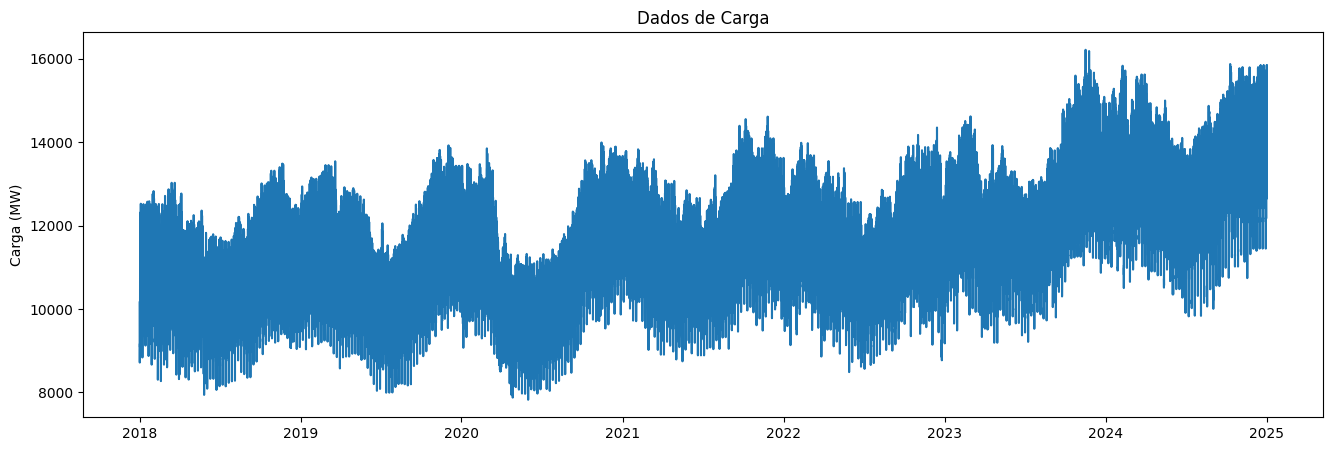

In [31]:
plt.figure(figsize=(16, 5))
plt.plot(dados_normalizados.index, dados_normalizados['Carga'], linestyle='-')
plt.title('Dados de Carga')
plt.ylabel('Carga (MW)')
plt.show()

In [32]:
# Retira caracteristicas dos dados

dados_normalizados['ano_mes'] = dados_normalizados.index.to_period('M')  # Formato YYYY-MM
dados_normalizados['ano'] = dados_normalizados.index.year
estatisticas_mes = dados_normalizados.groupby('ano_mes')['Carga'].agg(['min', 'mean', 'max'])
estatisticas_mes
estatisticas = dados_normalizados.groupby('ano')['Carga'].agg(['min', 'mean', 'max'])
estatisticas
estatisticas_mes['aumento_min'] = estatisticas_mes['min'].pct_change() * 100
estatisticas_mes['aumento_medio'] = estatisticas_mes['mean'].pct_change() * 100
estatisticas_mes['aumento_max'] = estatisticas_mes['max'].pct_change() * 100
estatisticas_mes.index = estatisticas_mes.index.to_timestamp()
estatisticas['aumento_min'] = estatisticas['min'].pct_change() * 100
estatisticas['aumento_medio'] = estatisticas['mean'].pct_change() * 100
estatisticas['aumento_max'] = estatisticas['max'].pct_change() * 100

In [33]:
estatisticas_mes

,min,mean,max,aumento_min,aumento_medio,aumento_max
ano_mes,,,,,,
2018-01-01,8664.29150,11014.152944,12758.74400,NaN,NaN,NaN
2018-02-01,8269.41900,10879.448599,12827.15850,-4.557470,-1.223011,0.536217
2018-03-01,8317.48700,11039.949196,13026.51975,0.581274,1.475264,1.554212
2018-04-01,8305.76350,10646.169841,12769.23250,-0.140950,-3.566858,-1.975104
2018-05-01,7938.44455,10588.607656,12359.65150,-4.422459,-0.540684,-3.207562
...,...,...,...,...,...,...
2024-08-01,9834.73200,12856.107942,14872.36800,0.126926,3.330105,3.762273
2024-09-01,10003.59350,13190.073874,15141.66250,1.716991,2.597722,1.810704
2024-10-01,10748.07150,13937.427869,15875.69300,7.442106,5.666033,4.847754


In [34]:
estatisticas

,min,mean,max,aumento_min,aumento_medio,aumento_max
ano,,,,,,
2018,7938.44455,10853.883800,13486.88350,NaN,NaN,NaN
2019,7991.61200,11123.661831,13923.86300,0.669746,2.485544,3.240033
2020,7821.62750,11011.115350,13993.66625,-2.127036,-1.011775,0.501321
2021,8743.76550,11709.846911,14613.64200,11.789592,6.345693,4.430403
2022,8485.70800,11566.533779,14351.75750,-2.951331,-1.223869,-1.792055
2023,9174.27300,12434.118068,16217.03550,8.114408,7.500815,12.996861
2024,9822.26500,13300.276425,15875.69300,7.063143,6.965981,-2.104839


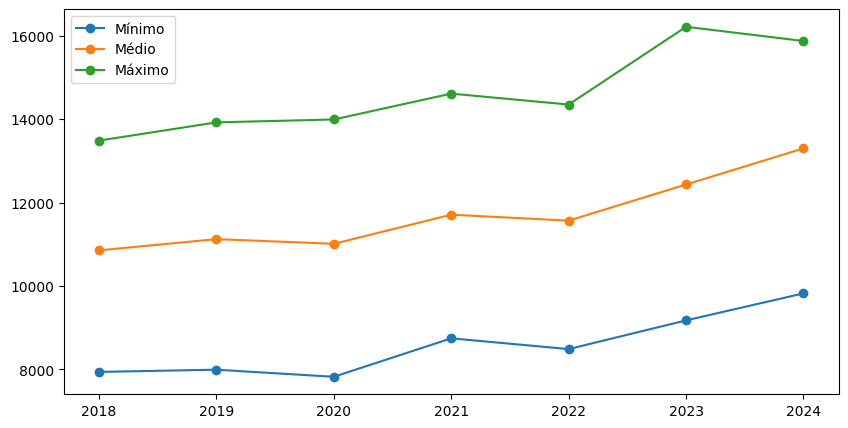

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(estatisticas.index, estatisticas['min'], marker='o', linestyle='-', label='Mínimo')
plt.plot(estatisticas.index, estatisticas['mean'], marker='o', linestyle='-', label='Médio')
plt.plot(estatisticas.index, estatisticas['max'], marker='o', linestyle='-', label='Máximo')
plt.legend()
plt.show()

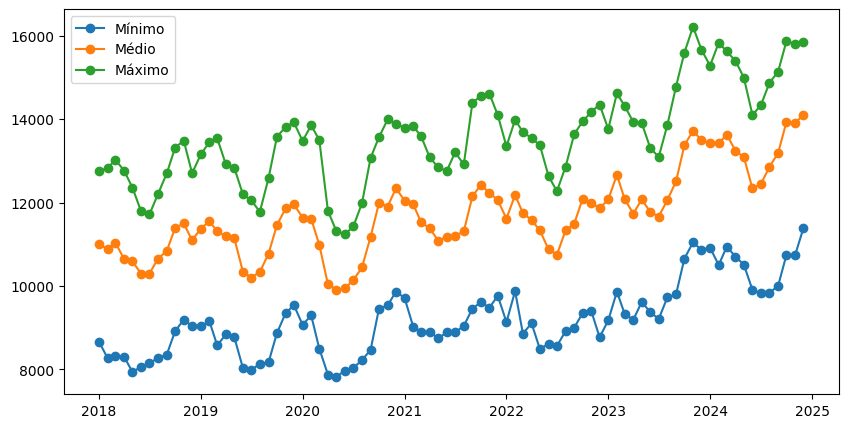

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(estatisticas_mes.index, estatisticas_mes['min'], marker='o', linestyle='-', label='Mínimo')
plt.plot(estatisticas_mes.index, estatisticas_mes['mean'], marker='o', linestyle='-', label='Médio')
plt.plot(estatisticas_mes.index, estatisticas_mes['max'], marker='o', linestyle='-', label='Máximo')
plt.legend()
plt.show()

In [37]:
print('O aumento medio foi:')
print(f"Valor mínimo = {estatisticas['aumento_min'].mean()}")
print(f"Valor medio = {estatisticas['aumento_medio'].mean()}")
print(f"Valor máximo = {estatisticas['aumento_max'].mean()}")
print('')
print('O aumento máximo foi de:')
print(f"Valor máximo = {estatisticas['aumento_max'].max()}")

O aumento medio foi:
Valor mínimo = 3.759753679653658
Valor medio = 3.5103981609824366
Valor máximo = 2.878620647395863

O aumento máximo foi de:
Valor máximo = 12.996861185816444


A partir desses valores foi escolhido uma folga de 10% cima somente e 10% para baixo (3 anos, minimo de 10%)

Para temperatura foi definido 10% de folga para cima e para baixo

In [38]:
# Retirando colunas auxiliares

print(dados_normalizados.columns)
dados_normalizados.drop(['ano_mes', 'ano'], axis='columns', inplace=True)
print(dados_normalizados.columns)

Index(['Carga', 'Temperatura', 'seno_dia_semana', 'cosseno_dia_semana',
       'seno_mes', 'cosseno_mes', 'ano_mes', 'ano'],
      dtype='object')
Index(['Carga', 'Temperatura', 'seno_dia_semana', 'cosseno_dia_semana',
       'seno_mes', 'cosseno_mes'],
      dtype='object')


#### Normalizando os dados

In [39]:
carga_maximo = dados_normalizados["Carga"].max()
carga_minimo = dados_normalizados["Carga"].min()

print(f'Valor máximo de carga: {carga_maximo}')
print(f'Valor mínimo de carga: {carga_minimo}')

Valor máximo de carga: 16217.0355
Valor mínimo de carga: 7821.6275


In [40]:
# Adicionando a folga de 10%

carga_maxima_para_normalizacao = carga_maximo*1.1
carga_minima_para_normalizacao = carga_minimo*0.9

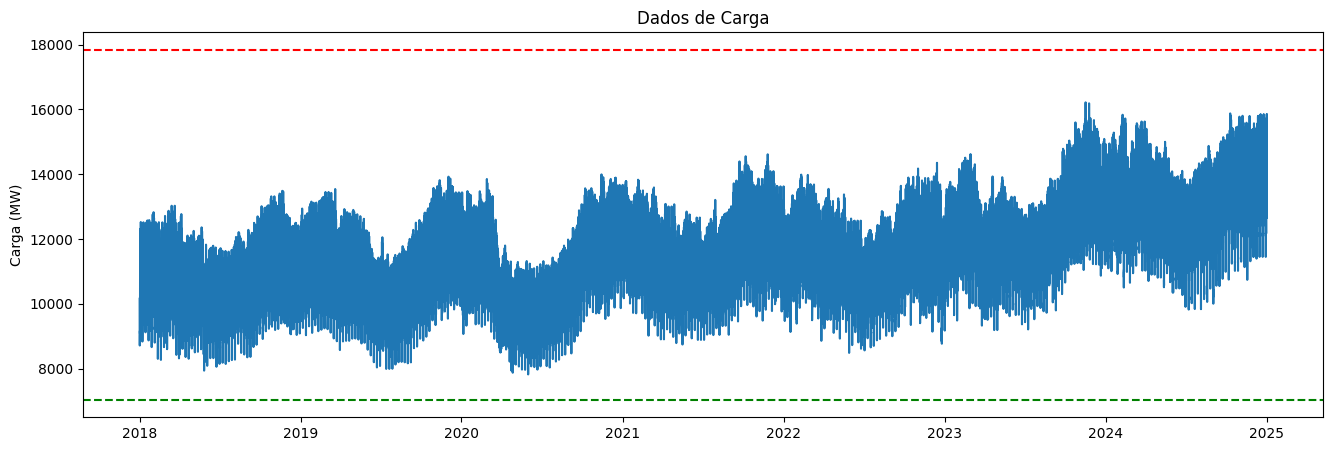

In [41]:
plt.figure(figsize=(16, 5))
plt.plot(dados_normalizados.index, dados_normalizados['Carga'], linestyle='-')
plt.axhline(y=carga_maxima_para_normalizacao, color='r', linestyle='--')
plt.axhline(y=carga_minima_para_normalizacao, color='g', linestyle='--')
plt.title('Dados de Carga')
plt.ylabel('Carga (MW)')
plt.show()

In [42]:
# Realizando a normalização

dados_normalizados['Carga'] = 2*(dados_normalizados['Carga'] - carga_minima_para_normalizacao) / (carga_maxima_para_normalizacao - carga_minima_para_normalizacao)-1
dados_normalizados

,Carga,Temperatura,seno_dia_semana,cosseno_dia_semana,seno_mes,cosseno_mes
DataHora,,,,,,
2018-01-01 01:00:00,-0.422549,26.783001,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 02:00:00,-0.475646,26.443001,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 03:00:00,-0.470612,26.273001,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 04:00:00,-0.466199,26.273001,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 05:00:00,-0.465934,25.386999,0.000000,1.00000,5.000000e-01,0.866025
...,...,...,...,...,...,...
2024-12-31 19:00:00,0.518957,27.784000,0.781831,0.62349,-2.449294e-16,1.000000
2024-12-31 20:00:00,0.518704,27.784000,0.781831,0.62349,-2.449294e-16,1.000000
2024-12-31 21:00:00,0.512700,27.387000,0.781831,0.62349,-2.449294e-16,1.000000


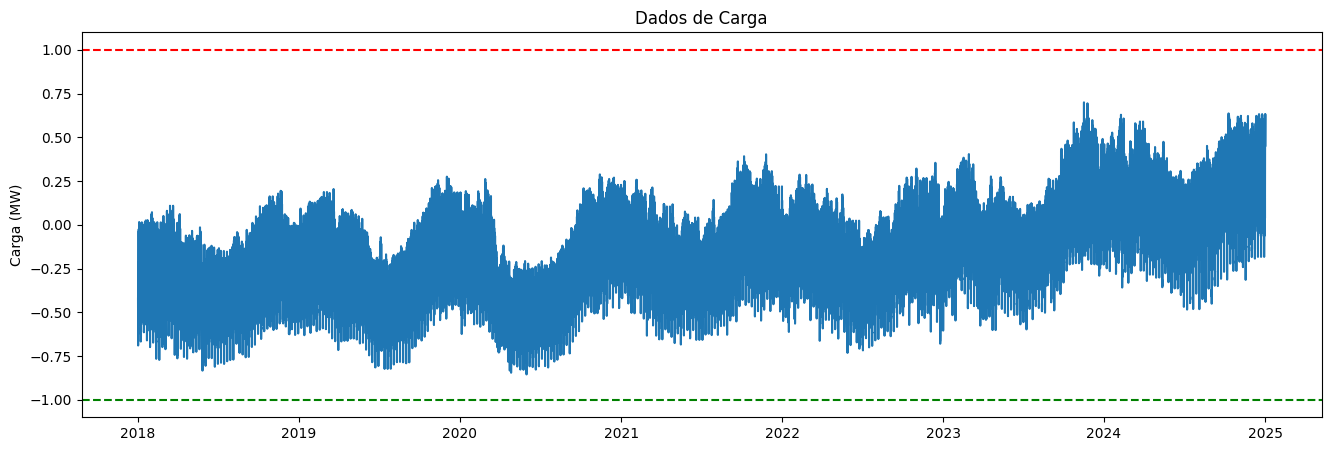

In [43]:
plt.figure(figsize=(16, 5))
plt.plot(dados_normalizados.index, dados_normalizados['Carga'], linestyle='-')
plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=-1, color='g', linestyle='--')
plt.title('Dados de Carga')
plt.ylabel('Carga (MW)')
plt.show()

### Temperatura

In [44]:
temperatura_maxima = dados_normalizados["Temperatura"].max()
temperatura_minimo = dados_normalizados["Temperatura"].min()

print(f'Valor máximo de carga: {temperatura_maxima}')
print(f'Valor mínimo de carga: {temperatura_minimo}')

Valor máximo de carga: 32.769
Valor mínimo de carga: 20.431999206543


In [45]:
# Adicionando a folga de 10%

temperatura_maxima_para_normalizacao = temperatura_maxima*1.1
temperatura_minima_para_normalizacao = temperatura_minimo*0.9

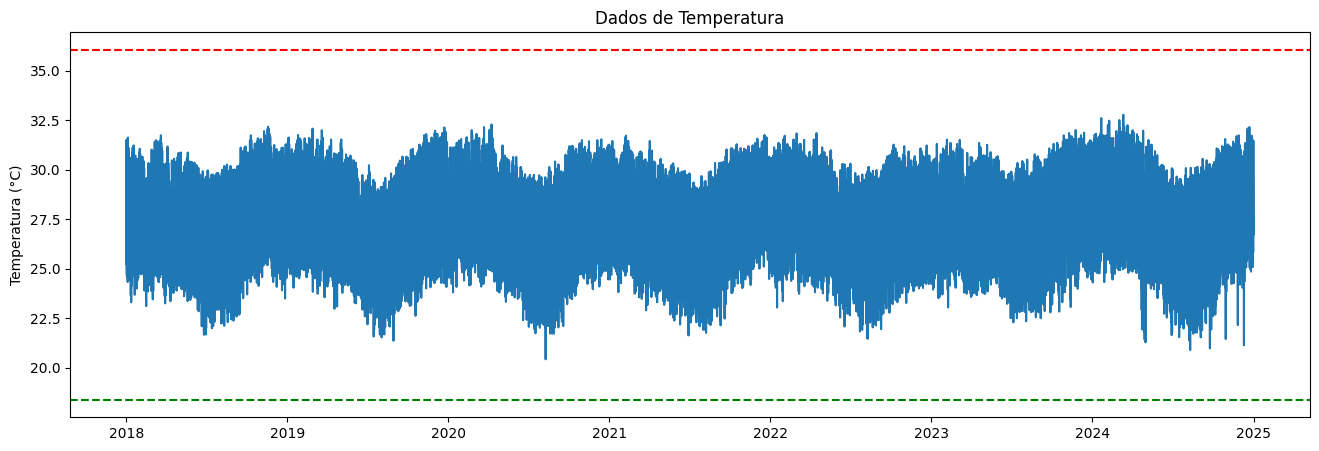

In [46]:
plt.figure(figsize=(16, 5))
plt.plot(dados_normalizados.index, dados_normalizados['Temperatura'], linestyle='-')
plt.axhline(y=temperatura_maxima_para_normalizacao, color='r', linestyle='--')
plt.axhline(y=temperatura_minima_para_normalizacao, color='g', linestyle='--')
plt.title('Dados de Temperatura')
plt.ylabel('Temperatura (°C)')
plt.show()

In [47]:
# Realizando a normalização

dados_normalizados['Temperatura'] = 2*(dados_normalizados['Temperatura'] - temperatura_minima_para_normalizacao) / (temperatura_maxima_para_normalizacao - temperatura_minima_para_normalizacao)-1
dados_normalizados

,Carga,Temperatura,seno_dia_semana,cosseno_dia_semana,seno_mes,cosseno_mes
DataHora,,,,,,
2018-01-01 01:00:00,-0.422549,-0.049198,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 02:00:00,-0.475646,-0.087710,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 03:00:00,-0.470612,-0.106965,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 04:00:00,-0.466199,-0.106965,0.000000,1.00000,5.000000e-01,0.866025
2018-01-01 05:00:00,-0.465934,-0.207322,0.000000,1.00000,5.000000e-01,0.866025
...,...,...,...,...,...,...
2024-12-31 19:00:00,0.518957,0.064184,0.781831,0.62349,-2.449294e-16,1.000000
2024-12-31 20:00:00,0.518704,0.064184,0.781831,0.62349,-2.449294e-16,1.000000
2024-12-31 21:00:00,0.512700,0.019216,0.781831,0.62349,-2.449294e-16,1.000000


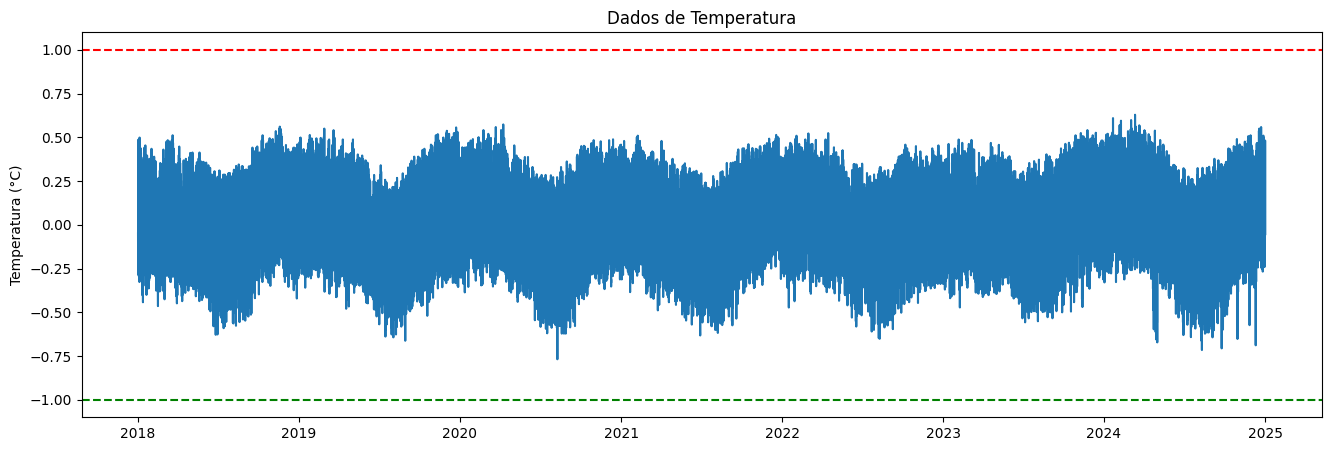

In [48]:
plt.figure(figsize=(16, 5))
plt.plot(dados_normalizados.index, dados_normalizados['Temperatura'], linestyle='-')
plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=-1, color='g', linestyle='--')
plt.title('Dados de Temperatura')
plt.ylabel('Temperatura (°C)')
plt.show()

## Salvando normalizações e pré processamento

In [49]:
dicionario_de_normalizacao = {'Carga': [carga_minima_para_normalizacao, carga_maxima_para_normalizacao], 'Exo_Temperatura': [temperatura_minima_para_normalizacao, temperatura_maxima_para_normalizacao]}
df_min_max = pd.DataFrame(dicionario_de_normalizacao, index=['Min', 'Max'])
df_min_max

,Carga,Exo_Temperatura
Min,7039.46475,18.388799
Max,17838.73905,36.045900


In [50]:
# Salvando normalização

df_min_max.to_csv(f'Normalizacao_NE.txt')

In [51]:
# Retirando os primeiros dois dias da base

dados_normalizados = dados_normalizados[dados_normalizados.index >= '2018-01-03 00:00:00']
dados_normalizados

,Carga,Temperatura,seno_dia_semana,cosseno_dia_semana,seno_mes,cosseno_mes
DataHora,,,,,,
2018-01-03 00:00:00,-0.035083,-0.094166,0.974928,-0.222521,5.000000e-01,0.866025
2018-01-03 01:00:00,-0.095231,-0.121917,0.974928,-0.222521,5.000000e-01,0.866025
2018-01-03 02:00:00,-0.179115,-0.166885,0.974928,-0.222521,5.000000e-01,0.866025
2018-01-03 03:00:00,-0.234020,-0.213778,0.974928,-0.222521,5.000000e-01,0.866025
2018-01-03 04:00:00,-0.285304,-0.269167,0.974928,-0.222521,5.000000e-01,0.866025
...,...,...,...,...,...,...
2024-12-31 19:00:00,0.518957,0.064184,0.781831,0.623490,-2.449294e-16,1.000000
2024-12-31 20:00:00,0.518704,0.064184,0.781831,0.623490,-2.449294e-16,1.000000
2024-12-31 21:00:00,0.512700,0.019216,0.781831,0.623490,-2.449294e-16,1.000000


In [52]:
# Separando dados de treinamento

dados_treinamento_normalizados = dados_normalizados[dados_normalizados.index < '2024-01-01']
dados_treinamento_normalizados

,Carga,Temperatura,seno_dia_semana,cosseno_dia_semana,seno_mes,cosseno_mes
DataHora,,,,,,
2018-01-03 00:00:00,-0.035083,-0.094166,0.974928,-0.222521,5.000000e-01,0.866025
2018-01-03 01:00:00,-0.095231,-0.121917,0.974928,-0.222521,5.000000e-01,0.866025
2018-01-03 02:00:00,-0.179115,-0.166885,0.974928,-0.222521,5.000000e-01,0.866025
2018-01-03 03:00:00,-0.234020,-0.213778,0.974928,-0.222521,5.000000e-01,0.866025
2018-01-03 04:00:00,-0.285304,-0.269167,0.974928,-0.222521,5.000000e-01,0.866025
...,...,...,...,...,...,...
2023-12-31 19:00:00,0.177799,0.077210,-0.781831,0.623490,-2.449294e-16,1.000000
2023-12-31 20:00:00,0.238640,0.044928,-0.781831,0.623490,-2.449294e-16,1.000000
2023-12-31 21:00:00,0.262711,0.038698,-0.781831,0.623490,-2.449294e-16,1.000000


In [53]:
# Separando dados de validação

dados_validacao_normalizados = dados_normalizados[dados_normalizados.index >= '2023-12-29 00:00:00']
dados_validacao_normalizados

,Carga,Temperatura,seno_dia_semana,cosseno_dia_semana,seno_mes,cosseno_mes
DataHora,,,,,,
2023-12-29 00:00:00,0.437114,-0.089975,-0.433884,-0.900969,-2.449294e-16,1.0
2023-12-29 01:00:00,0.359573,-0.143438,-0.433884,-0.900969,-2.449294e-16,1.0
2023-12-29 02:00:00,0.275589,-0.171076,-0.433884,-0.900969,-2.449294e-16,1.0
2023-12-29 03:00:00,0.202454,-0.162694,-0.433884,-0.900969,-2.449294e-16,1.0
2023-12-29 04:00:00,0.155359,-0.229069,-0.433884,-0.900969,-2.449294e-16,1.0
...,...,...,...,...,...,...
2024-12-31 19:00:00,0.518957,0.064184,0.781831,0.623490,-2.449294e-16,1.0
2024-12-31 20:00:00,0.518704,0.064184,0.781831,0.623490,-2.449294e-16,1.0
2024-12-31 21:00:00,0.512700,0.019216,0.781831,0.623490,-2.449294e-16,1.0


In [54]:
# Salvando dados

dados_treinamento_normalizados.to_csv('NE_treinamento.csv')
dados_validacao_normalizados.to_csv('NE_validacao.csv')